## Adjusted graphs with interpretations

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
from datetime import datetime
from datetime import date

In [75]:
data = pd.read_csv("C:\\Users\\amaia\\Downloads\\lung_cancer_mortality_sample.csv")

In [4]:
#converting to datetime
data["diagnosis_date"] = pd.to_datetime(data["diagnosis_date"], format="%d/%m/%Y")
data["beginning_of_treatment_date"] = pd.to_datetime(data["beginning_of_treatment_date"], format="%d/%m/%Y")
data["end_treatment_date"] = pd.to_datetime(data["end_treatment_date"], format="%d/%m/%Y")

In [5]:
#calculating length of treatment

data["time_between_diganosis_and_treatment"] = data["beginning_of_treatment_date"] - data["diagnosis_date"]
data["treatment_length"] = data["end_treatment_date"] - data["beginning_of_treatment_date"] 
data["treatment_length"] = data["treatment_length"].astype("int64")

## Count plots

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162500 entries, 0 to 162499
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype          
---  ------                                --------------   -----          
 0   id                                    162500 non-null  int64          
 1   age                                   162500 non-null  int64          
 2   gender                                162500 non-null  object         
 3   country                               162500 non-null  object         
 4   diagnosis_date                        162500 non-null  datetime64[ns] 
 5   cancer_stage                          162500 non-null  object         
 6   beginning_of_treatment_date           162500 non-null  datetime64[ns] 
 7   family_history                        162500 non-null  object         
 8   smoking_status                        162500 non-null  object         
 9   bmi                                   162500 non

In [7]:
plot_data = data

plot_data.rename(columns={'survived': 'Outcome'}, inplace=True)
plot_data.rename(columns={'cancer_stage': 'Cancer stage'}, inplace=True)
plot_data.rename(columns={'gender': 'Gender'}, inplace=True)
# Map the values in 'survival_status' to more descriptive labels
plot_data['Outcome'] = plot_data['Outcome'].map({0: 'Deceased', 1: 'Alive'})

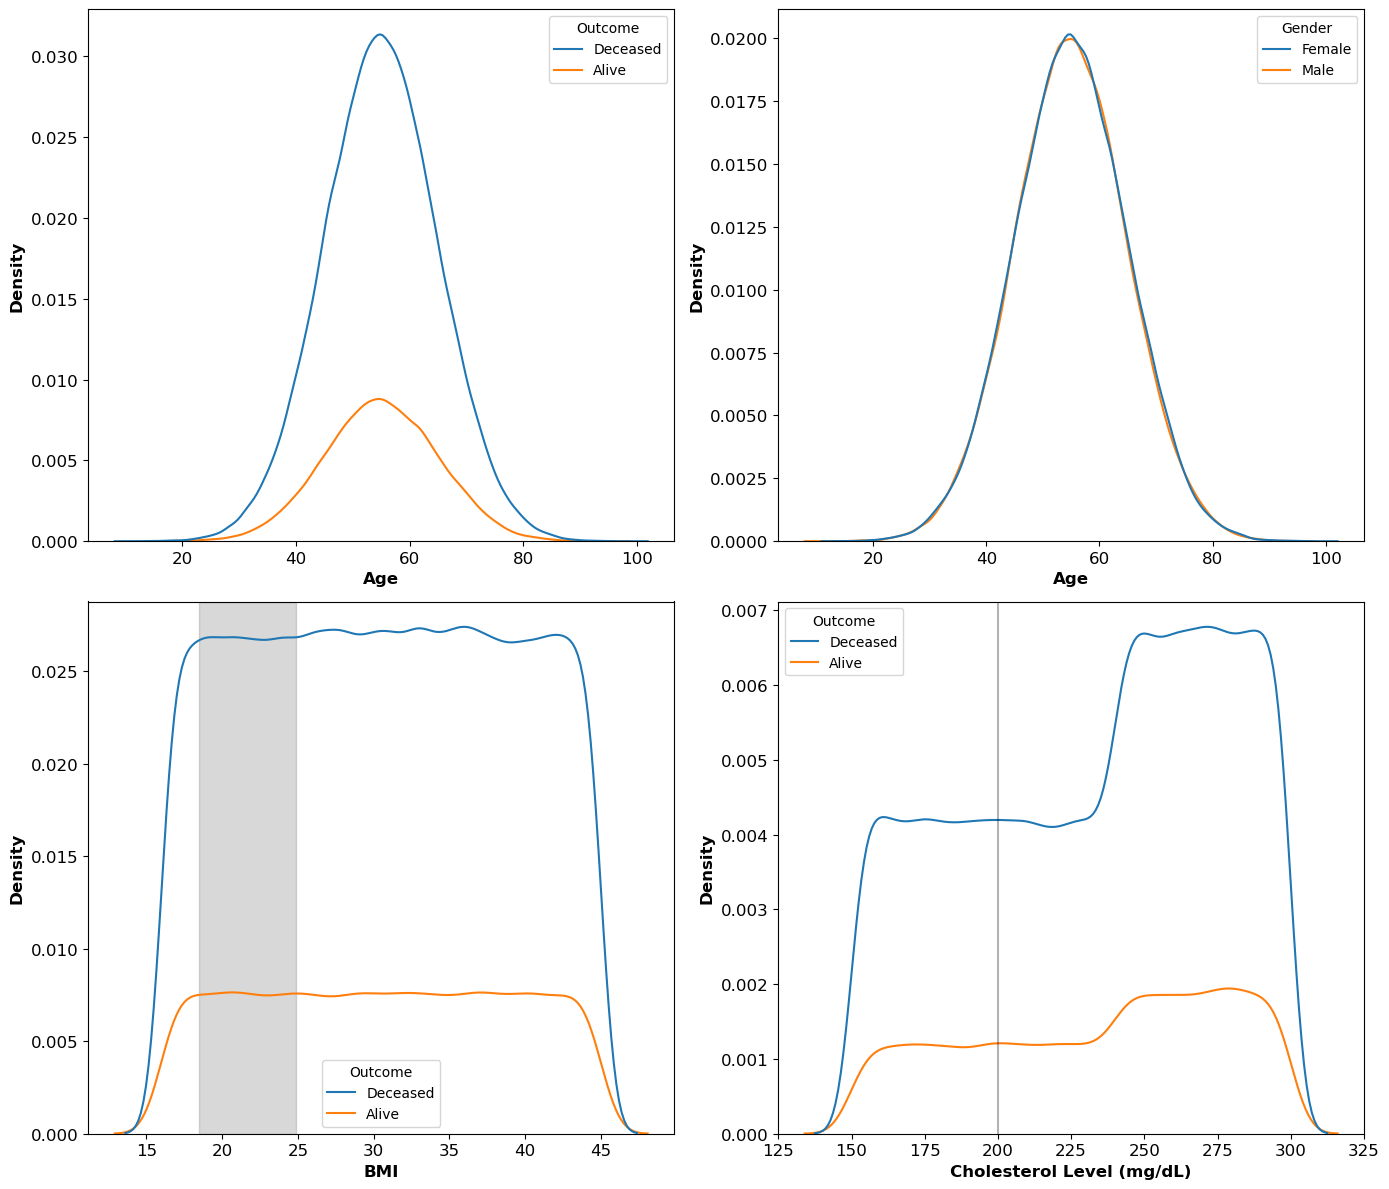

In [8]:
fig, axes = plt.subplots(ncols=2, nrows = 2, figsize=(14, 12))

#age plots
sns.kdeplot(plot_data, x="age", hue="Outcome", ax=axes[0,0])
axes[0, 0].set_xlabel('Age', weight = "bold", size = 12)
axes[0, 0].set_ylabel('Density', weight = "bold", size = 12)
axes[0, 0].tick_params(axis='x', labelsize=12)
axes[0, 0].tick_params(axis='y', labelsize=12)

sns.kdeplot(plot_data, x="age", hue= "Gender", ax=axes[0,1])
axes[0, 1].set_xlabel('Age', weight = "bold", size = 12)
axes[0, 1].set_ylabel('Density', weight = "bold", size = 12)
axes[0, 1].tick_params(axis='x', labelsize=12)
axes[0, 1].tick_params(axis='y', labelsize=12)


#bmi plot
sns.kdeplot(data, x="bmi", hue="Outcome", ax=axes[1,0])
axes[1, 0].tick_params(axis='x', labelsize=12)
axes[1, 0].tick_params(axis='y', labelsize=12)
axes[1, 0].set_xlabel('BMI', weight = "bold", size = 12)
axes[1, 0].set_ylabel('Density', weight = "bold", size = 12)

#this rectangle shades in the normal bmi range so we can see who falls outside of it (https://www.nhs.uk/conditions/obesity/)
axes[1,0].axvspan(18.5, 24.9, alpha = 0.3, color='gray')

#cholesterol graph
sns.kdeplot(plot_data, x="cholesterol_level", hue="Outcome",  ax=axes[1,1])
axes[1, 1].set_xlabel('Cholesterol Level (mg/dL)', weight = "bold", size = 12)
axes[1, 1].set_ylabel('Density', weight = "bold", size = 12)
axes[1, 1].tick_params(axis='x', labelsize=12)
axes[1, 1].tick_params(axis='y', labelsize=12)


#instead of adding i've put the line at 200 as past that is where high cholesterol starts (https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)
axes[1,1].axvline(200,c= 'black', alpha = 0.3)


#plt.show()

plt.tight_layout()
plt.savefig('data distributions.png', transparent=True, dpi=300)

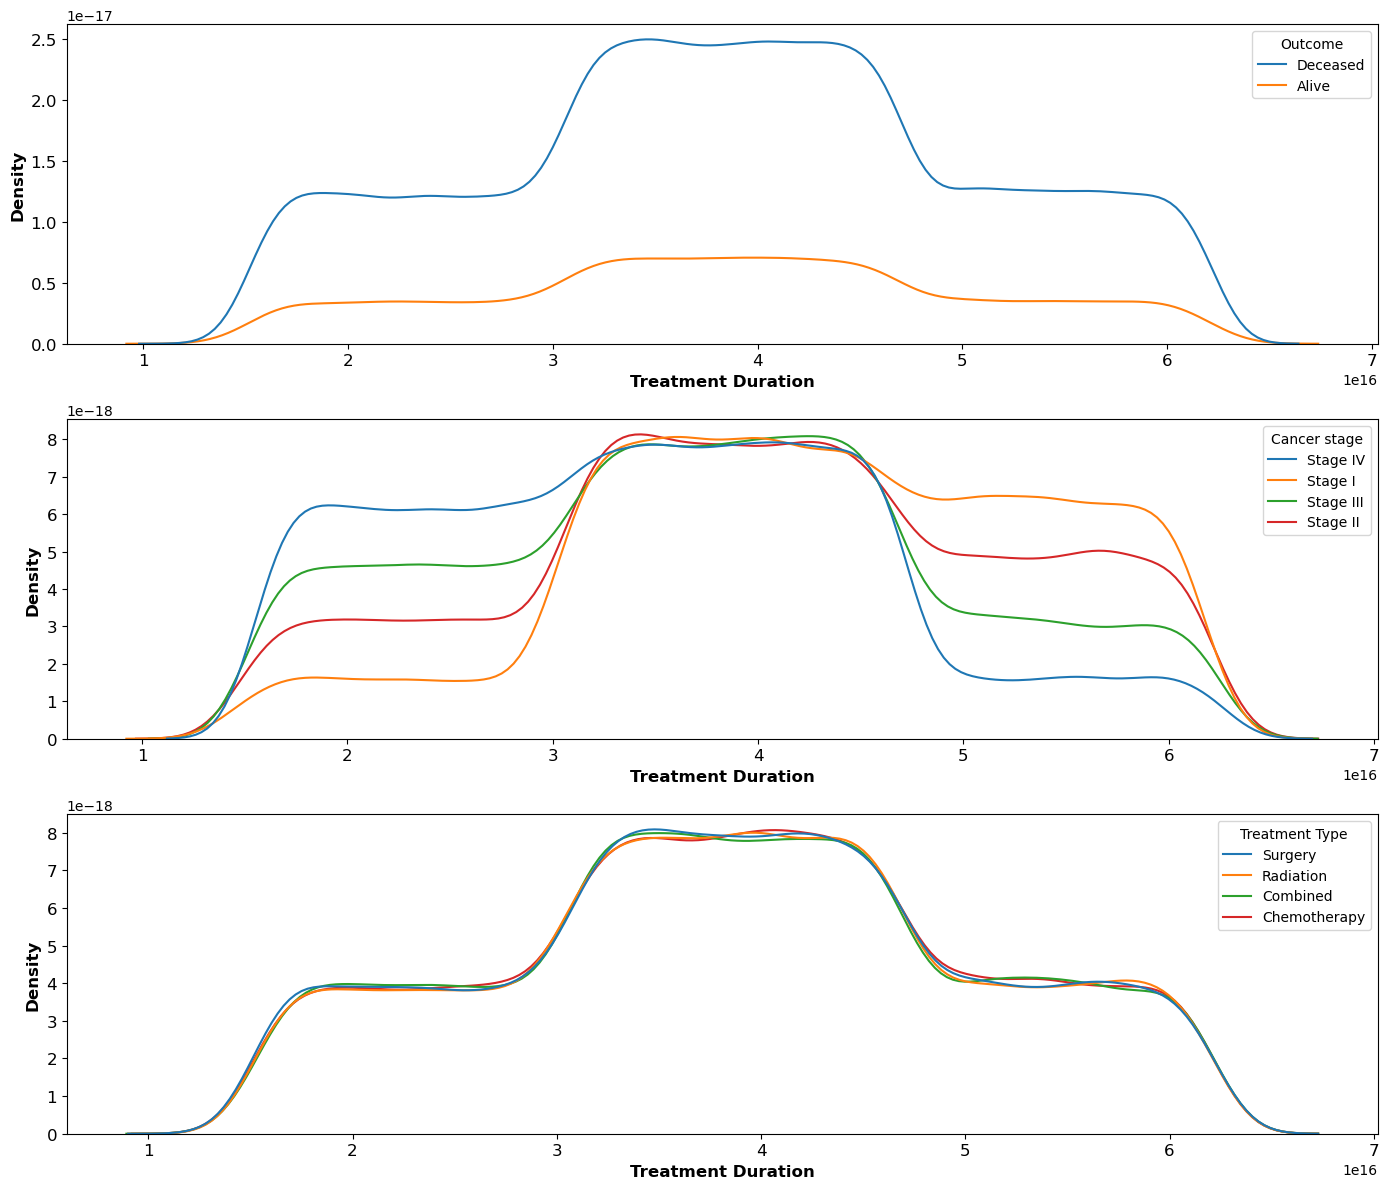

In [9]:
fig, axes = plt.subplots(ncols=1, nrows = 3, figsize=(14, 12))
#treatment Length graph
sns.kdeplot(plot_data, x="treatment_length", hue="Outcome", ax=axes[0])
axes[0].set_xlabel('Treatment Duration', weight = "bold", size = 12)
axes[0].set_ylabel('Density', weight = "bold", size = 12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

sns.kdeplot(plot_data, x="treatment_length", hue="Cancer stage", ax=axes[1])
axes[1].set_xlabel('Treatment Duration', weight = "bold", size = 12)
axes[1].set_ylabel('Density', weight = "bold", size = 12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plot_data.rename(columns={'treatment_type': 'Treatment Type'}, inplace=True)
sns.kdeplot(plot_data, x="treatment_length", hue="Treatment Type", ax=axes[2])
axes[2].set_xlabel('Treatment Duration', weight = "bold", size = 12)
axes[2].set_ylabel('Density', weight = "bold", size = 12)
axes[2].tick_params(axis='x', labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig('treatment distribution.png', transparent=True, dpi=300)

In [10]:
#cleaning data for plotting
plot_data.rename(columns={'hypertension': 'Hypertension'}, inplace=True)
plot_data.rename(columns={'asthma': 'Asthma'}, inplace=True)
plot_data.rename(columns={'cirrhosis': 'Cirrhosis'}, inplace=True)
plot_data.rename(columns={'other_cancer': 'Presence of other cancers'}, inplace=True)


In [11]:
# Map the values in 'survival_status' to more descriptive labels
plot_data['Hypertension'] = plot_data['Hypertension'].map({0: 'Absent', 1: 'Present'})
plot_data['Asthma'] = plot_data['Asthma'].map({0: 'Absent', 1: 'Present'})
plot_data['Presence of other cancers'] = plot_data['Presence of other cancers'].map({0: 'Absent', 1: 'Present'})
plot_data["Cirrhosis"] = plot_data["Cirrhosis"].map({0: 'Absent', 1: 'Present'})

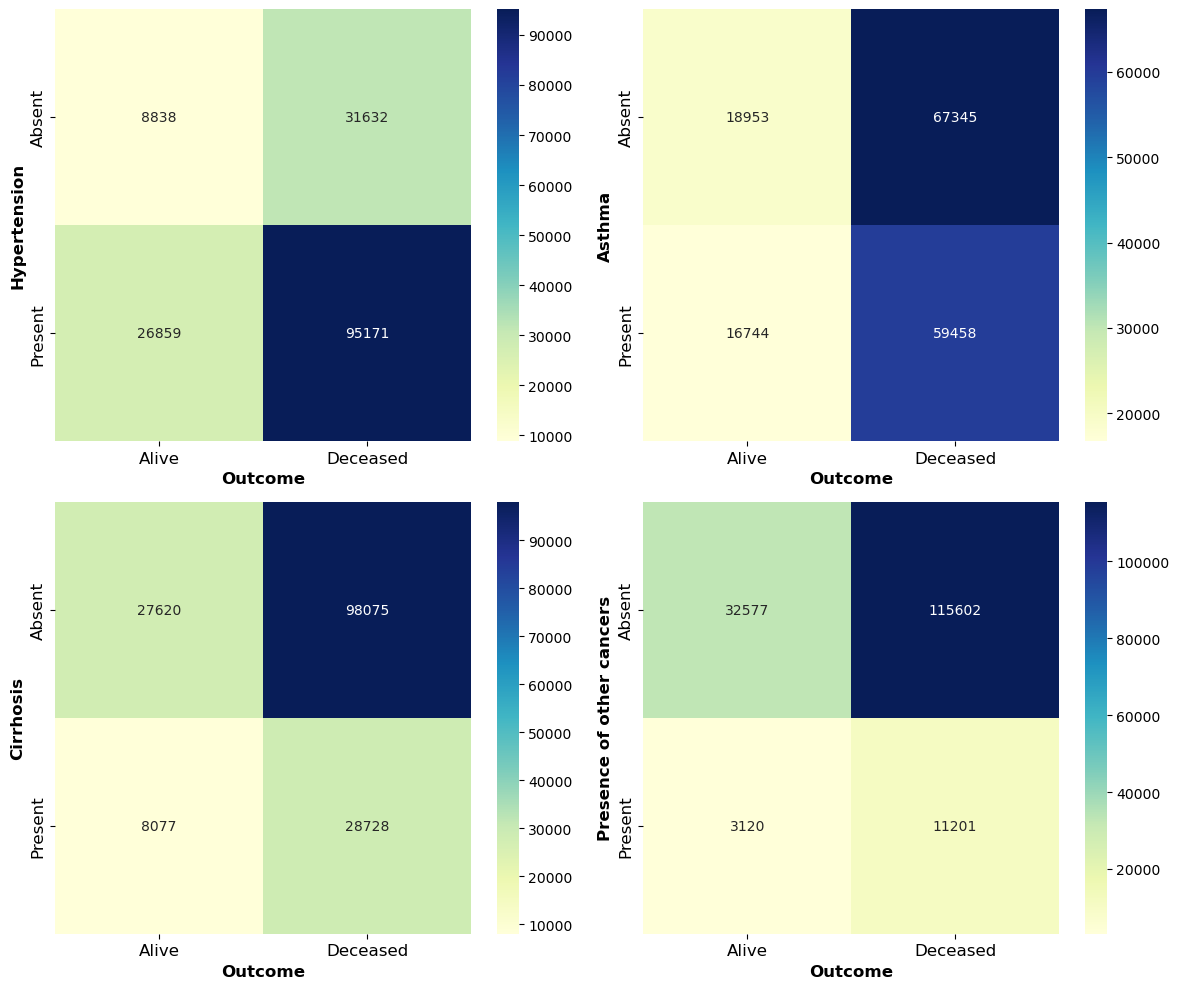

In [12]:
fig, axes = plt.subplots(ncols=2, nrows = 2, figsize=(12, 10))
cross = pd.crosstab(plot_data["Hypertension"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[0,0])
axes[0,0].set_xlabel('Outcome', weight = "bold", size = 12)
axes[0,0].set_ylabel('Hypertension', weight = "bold", size = 12)
axes[0,0].tick_params(axis='x', labelsize=12)
axes[0,0].tick_params(axis='y', labelsize=12)

cross = pd.crosstab(plot_data["Asthma"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[0,1])
axes[0,1].set_xlabel('Outcome', weight = "bold", size = 12)
axes[0,1].set_ylabel('Asthma', weight = "bold", size = 12)
axes[0,1].tick_params(axis='x', labelsize=12)
axes[0,1].tick_params(axis='y', labelsize=12)


cross = pd.crosstab(plot_data["Cirrhosis"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[1,0])
axes[1,0].set_xlabel('Outcome', weight = "bold", size = 12)
axes[1,0].set_ylabel('Cirrhosis', weight = "bold", size = 12)
axes[1,0].tick_params(axis='x', labelsize=12)
axes[1,0].tick_params(axis='y', labelsize=12)


cross = pd.crosstab(plot_data["Presence of other cancers"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[1,1])
axes[1,1].set_xlabel('Outcome', weight = "bold", size = 12)
axes[1,1].set_ylabel('Presence of other cancers', weight = "bold", size = 12)
axes[1,1].tick_params(axis='x', labelsize=12)
axes[1,1].tick_params(axis='y', labelsize=12)


plt.tight_layout()
plt.savefig('parameter distribution.png', transparent=True, dpi=300)

## Count map interpretation

### Hypertension
- Much higher proportion of patients with hypertension die from lung cancer. More than double than when hypertension is absent

### Asthma
- no significan difference between deaths with or without cancer, suggests there is little contribution to outcome

### Cirhosis
- interestingly there is a much higher proportion of deaths which are present in the absents of cirrhosis
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8179749/ - suggests no significant difference between survival with or without cirrhosis 

### Other cancers
- much higher proportion of deaths in those without other cancers,
- higher survival without other cancers



In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162500 entries, 0 to 162499
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype          
---  ------                                --------------   -----          
 0   id                                    162500 non-null  int64          
 1   age                                   162500 non-null  int64          
 2   Gender                                162500 non-null  object         
 3   country                               162500 non-null  object         
 4   diagnosis_date                        162500 non-null  datetime64[ns] 
 5   Cancer stage                          162500 non-null  object         
 6   beginning_of_treatment_date           162500 non-null  datetime64[ns] 
 7   family_history                        162500 non-null  object         
 8   smoking_status                        162500 non-null  object         
 9   bmi                                   162500 non

## Chi- Squared _TEST DATA


In [30]:
from scipy.stats import chi2_contingency

In [31]:
large_data = pd.read_csv("C:\\Users\\amaia\\Downloads\\archive(4)\\lung_cancer_mortality_data_large_v2.csv")
five

In [32]:
large_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   age                          float64
 2   gender                       object 
 3   country                      object 
 4   diagnosis_date               object 
 5   cancer_stage                 object 
 6   beginning_of_treatment_date  object 
 7   family_history               object 
 8   smoking_status               object 
 9   bmi                          float64
 10  cholesterol_level            int64  
 11  hypertension                 int64  
 12  asthma                       int64  
 13  cirrhosis                    int64  
 14  other_cancer                 int64  
 15  treatment_type               object 
 16  end_treatment_date           object 
 17  survived                     int64  
dtypes: float64(2), int64(7), object(9)
memory 

In [33]:
fifty = large_data.sample(frac = .5, random_state = 42)

In [34]:
twenty_five = large_data.sample(frac = .25, random_state = 42)

In [35]:
#five = large_data.sample(frac = .5, random_state = 42)

In [48]:
#hypotension
cross_as100 = pd.crosstab(large_data["asthma"], large_data["survived"])
cross_as50 = pd.crosstab(fifty["asthma"], fifty["survived"])
cross_as25 = pd.crosstab(twenty_five["asthma"],twenty_five["survived"])
cross_as5 = pd.crosstab(five["asthma"], five["survived"])


In [49]:
chi2, p100, dof, expected = chi2_contingency(cross_as100)
chi2, p50, dof, expected = chi2_contingency(cross_as50)
chi2, p25, dof, expected = chi2_contingency(cross_as25)
chi2, p5, dof, expected = chi2_contingency(cross_as25)

print(f"P-Value 100: {p100}")
print(f"P-Value 50: {p50}")
print(f"P-Value 25: {p25}")
print(f"P-Value 5: {p5}")

P-Value 100: 0.9046525386670903
P-Value 50: 0.9761662058806535
P-Value 25: 0.9409579542364533
P-Value 5: 0.9409579542364533


In [50]:
#hypotension
cross_hy100 = pd.crosstab(large_data["hypertension"], large_data["survived"])
cross_hy50 = pd.crosstab(fifty["hypertension"], fifty["survived"])
cross_hy25 = pd.crosstab(twenty_five["hypertension"],twenty_five["survived"])
cross_hy5 = pd.crosstab(five["hypertension"], five["survived"])


In [51]:
chi2, p100, dof, expected = chi2_contingency(cross_hy100)
chi2, p50, dof, expected = chi2_contingency(cross_hy50)
chi2, p25, dof, expected = chi2_contingency(cross_hy25)
chi2, p5, dof, expected = chi2_contingency(cross_hy5)

print(f"P-Value 100: {p100}")
print(f"P-Value 50: {p50}")
print(f"P-Value 25: {p25}")
print(f"P-Value 5: {p5}")

P-Value 100: 0.04771957364782308
P-Value 50: 0.164856306188348
P-Value 25: 0.039289479695055037
P-Value 5: 0.164856306188348


In [56]:
#other cancers
cross_oc100 = pd.crosstab(large_data["other_cancer"], large_data["survived"])
cross_oc50 = pd.crosstab(fifty["other_cancer"], fifty["survived"])
cross_oc25 = pd.crosstab(twenty_five["other_cancer"], twenty_five["survived"])
cross_oc5 = pd.crosstab(five["other_cancer"], five["survived"])


In [57]:

chi2, p100, dof, expected = chi2_contingency(cross_oc100)
chi2, p50, dof, expected = chi2_contingency(cross_oc50)
chi2, p25, dof, expected = chi2_contingency(cross_oc25)
chi2, p5, dof, expected = chi2_contingency(cross_oc5)

print(f"P-Value 100: {p100}")
print(f"P-Value 50: {p50}")
print(f"P-Value 25: {p25}")
print(f"P-Value 5: {p5}")

P-Value 100: 0.022410855508791613
P-Value 50: 0.08837811412111658
P-Value 25: 0.18677630559490604
P-Value 5: 0.08837811412111658


In [58]:
#cihrossis
cross_ci100 = pd.crosstab(large_data["cirrhosis"], large_data["survived"])
cross_ci50 = pd.crosstab(fifty["cirrhosis"], fifty["survived"])
cross_ci25 = pd.crosstab(twenty_five["cirrhosis"], twenty_five["survived"])
cross_ci5 = pd.crosstab(five["cirrhosis"], five["survived"])


In [59]:
chi2, p100, dof, expected = chi2_contingency(cross_ci100)
chi2, p50, dof, expected = chi2_contingency(cross_ci50)
chi2, p25, dof, expected = chi2_contingency(cross_ci25)
chi2, p5, dof, expected = chi2_contingency(cross_ci5)

print(f"P-Value 100: {p100}")
print(f"P-Value 50: {p50}")
print(f"P-Value 25: {p25}")
print(f"P-Value 5: {p5}")

P-Value 100: 0.6954676325880642
P-Value 50: 0.56409235755738
P-Value 25: 0.4587001204431075
P-Value 5: 0.56409235755738


In [61]:
data = {
    'Dataset': ['100%', '50%', '25%', '5%',
                '100%', '50%', '25%', '5%', 
                '100%', '50%', '25%', '5%', 
                '100%', '50%', '25%', '5%'],
    'Parameter': ['Cirrhosis', 'Cirrhosis', 'Cirrhosis', 'Cirrhosis',
                  'Hypertension', 'Hypertension', 'Hypertension', 'Hypertension',
                  'Other cancers', 'Other cancers', 'Other cancers', 'Other cancers',
                  "Asthma","Asthma","Asthma","Asthma"],
    'P-value': [0.69546, 0.56409, 0.45870, 0.56409,
                0.04771, 0.16485, 0.03928, 0.16485, 
                0.02241, 0.08837, 0.18677, 0.08837,
                0.90465, 0.97616, 0.94095, 0.94095]
}
# Create DataFrame
df = pd.DataFrame(data)

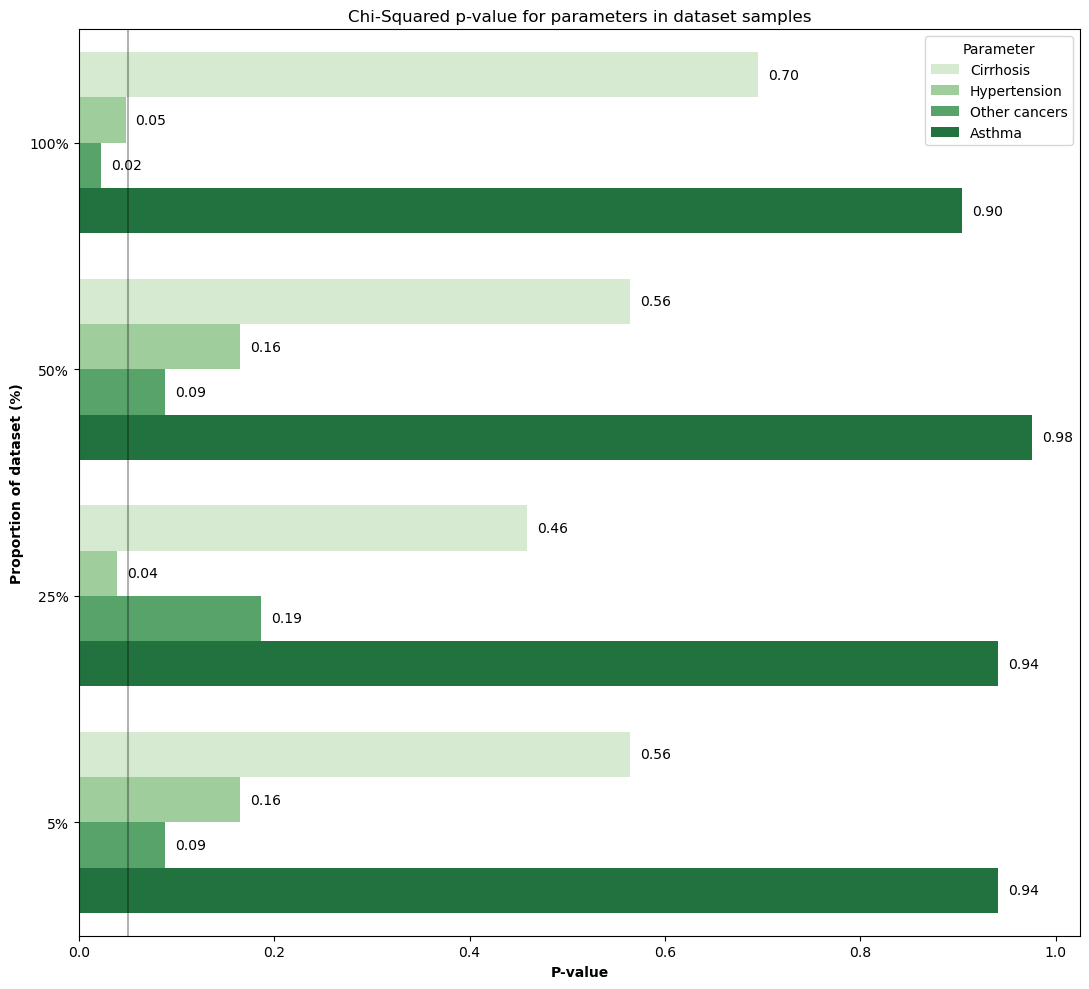

In [63]:
plt.figure(figsize=(11, 10))
barplot = sns.barplot(x='P-value', y='Dataset', hue='Parameter', data=df, orient='h', palette = "Greens")

plt.title("Chi-Squared p-value for parameters in dataset samples")
plt.ylabel("Proportion of dataset (%)", weight = "bold")
plt.xlabel("P-value", weight = "bold")
plt.axvline(0.05,c= 'black', alpha = 0.3)  
for p in barplot.patches:
    width = p.get_width()
    if width > 0:  # Only add text for bars with a width greater than zero
        plt.text(width + 0.01, 
                 p.get_y() + p.get_height() / 2, 
                 '{:1.2f}'.format(width), 
                 ha='left', 
                 va='center')

plt.tight_layout()
plt.savefig('chisquared pvalue sample size', transparent=True, dpi=300)

# Odds ratio on significant relationships



In [68]:
from scipy.stats.contingency import odds_ratio
from scipy import stats
from scipy.stats import fisher_exact

odds_ratio, p_value100 = stats.fisher_exact(cross_oc100)
odds_ratio, p_value50 = stats.fisher_exact(cross_oc50)
odds_ratio, p_value25 = stats.fisher_exact(cross_oc25)
odds_ratio, p_value5 = stats.fisher_exact(cross_oc5)
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value100}")
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value50}")
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value25}")
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value5}")

Odds Ratio: 0.9886209902238632, P-value: 0.02236066247406275
Odds Ratio: 0.9886209902238632, P-value: 0.08824627502746485
Odds Ratio: 0.9886209902238632, P-value: 0.18557270656850777
Odds Ratio: 0.9886209902238632, P-value: 0.08824627502746485


In [67]:
from scipy.stats.contingency import odds_ratio
odds_ratio, p_value100 = stats.fisher_exact(cross_hy100)
odds_ratio, p_value50 = stats.fisher_exact(cross_hy50)
odds_ratio, p_value25 = stats.fisher_exact(cross_hy25)
odds_ratio, p_value5 = stats.fisher_exact(cross_hy5)
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value100}")
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value50}")
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value25}")
print(f"Odds Ratio: {odds_ratio}, P-value: {p_value5}")

Odds Ratio: 1.0061084303211163, P-value: 0.04770179305016502
Odds Ratio: 1.0061084303211163, P-value: 0.16491454659204802
Odds Ratio: 1.0061084303211163, P-value: 0.03897987767138952
Odds Ratio: 1.0061084303211163, P-value: 0.16491454659204802


## smoking data


In [96]:
group = data.groupby(["smoking_status", "survived"]).size().reset_index(name="count")
group = pd.DataFrame(group)
group

,smoking_status,survived,count
0,Current Smoker,0,31714
1,Current Smoker,1,8824
2,Former Smoker,0,31498
3,Former Smoker,1,9038
4,Never Smoked,0,31633
5,Never Smoked,1,8998
6,Passive Smoker,0,31958
7,Passive Smoker,1,8837


In [103]:
smoking_table = pd.crosstab(group['smoking_status'],group['survived'], values=group['count'], aggfunc='sum', margins=True, margins_name='Total')
smoking_table

survived,0,1,Total
smoking_status,,,
Current Smoker,31714,8824,40538
Former Smoker,31498,9038,40536
Never Smoked,31633,8998,40631
Passive Smoker,31958,8837,40795
Total,126803,35697,162500


In [110]:
smoking_positive= data[(data["smoking_status"] == "Current Smoker") | (data["smoking_status"] == "Former Smoker")]
smoking_negative= data[(data["smoking_status"] != "Current Smoker") | (data["smoking_status"] != "Former Smoker")]

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
2,2512900,54,Female,Luxembourg,25/09/2022,Stage IV,26/09/2022,Yes,Former Smoker,23.4,198,1,0,1,0,Radiation,13/11/2023,0
3,499674,61,Female,Poland,20/10/2014,Stage I,05/11/2014,Yes,Former Smoker,42.4,249,1,0,0,0,Combined,31/08/2016,0
8,2784265,49,Male,Netherlands,22/12/2015,Stage II,08/01/2016,Yes,Former Smoker,25.6,161,1,0,0,1,Chemotherapy,14/04/2017,0
9,341640,40,Female,Austria,19/01/2022,Stage III,02/02/2022,No,Former Smoker,43.0,272,1,1,0,0,Combined,12/10/2022,0
10,584120,73,Male,Lithuania,22/11/2021,Stage I,26/11/2021,Yes,Current Smoker,30.0,174,1,1,0,0,Combined,01/05/2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162488,99927,43,Male,Croatia,23/01/2019,Stage IV,28/01/2019,No,Current Smoker,42.1,292,1,1,0,0,Chemotherapy,04/11/2019,1
162490,849259,53,Male,Czech Republic,23/12/2022,Stage II,30/12/2022,Yes,Current Smoker,18.7,173,0,0,0,0,Combined,22/08/2024,0
162493,99161,64,Male,Hungary,28/06/2023,Stage II,13/07/2023,No,Former Smoker,36.2,298,1,0,0,0,Chemotherapy,17/03/2024,0
162496,2781967,54,Male,Italy,14/03/2022,Stage IV,17/03/2022,Yes,Current Smoker,45.0,260,0,0,0,0,Radiation,20/10/2022,0


 ## continous variable normality and mannwhitney

## age

In [81]:
survivedage = data[data["survived"] ==1 ]["age"]
nonsurvivedage = data[data["survived"] ==0 ]["age"]
#t_stat, p_value = stats.ttest_ind(survived, nonsurvived)
#p_value
#t_stat

In [82]:
stat, p_value = stats.shapiro(survivedage)
print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic: 0.9991525411605835
p-value: 3.246653813848699e-12
Sample does not look Gaussian (reject H0)


In [86]:
stat, p_value = stats.mannwhitneyu(survivedage, nonsurvivedage)

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Determine directionality
if stat > (len(survivedage) * len(nonsurvivedage)) / 2:
    print('survived tends to have higher ranks (or values) than nonsurvived')
else:
    print('nonsurvived tends to have higher ranks (or values) than survived')

Statistic: 2269126354.5
p-value: 0.4521924916273313
survived tends to have higher ranks (or values) than nonsurvived


### bmi

In [77]:
survivedbmi = data[data["survived"] ==1 ]["bmi"]
nonsurvivedbmi = data[data["survived"] ==0 ]["bmi"]
#t_stat, p_value = stats.ttest_ind(survived, nonsurvived)
#p_value

In [79]:
stat, p_value = stats.shapiro(survivedbmi)
print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic: 0.9546211361885071
p-value: 0.0
Sample does not look Gaussian (reject H0)


In [87]:
stat, p_value = stats.mannwhitneyu(survivedbmi, nonsurvivedbmi)

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Determine directionality
if stat > (len(survivedbmi) * len(nonsurvivedbmi)) / 2:
    print('survived tends to have higher ranks (or values) than nonsurvived')
else:
    print('nonsurvived tends to have higher ranks (or values) than survived')

Statistic: 2259089271.5
p-value: 0.595703195824244
nonsurvived tends to have higher ranks (or values) than survived


### cholesterol

In [73]:
survived = data[data["survived"] ==1 ]["cholesterol_level"]
nonsurvived = data[data["survived"] ==0 ]["cholesterol_level"]

stat, p_value = stats.shapiro(nonsurvived)
print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic: 0.9970859289169312
p-value: 0.0
Sample does not look Gaussian (reject H0)


In [88]:
survived = data[data["survived"] ==1 ]["cholesterol_level"]
nonsurvived = data[data["survived"] ==0 ]["cholesterol_level"]

stat, p_value = stats.mannwhitneyu(survived, nonsurvived)

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Determine directionality
if stat > (len(survived) * len(nonsurvived)) / 2:
    print('survived tends to have higher ranks (or values) than nonsurvived')
else:
    print('nonsurvived tends to have higher ranks (or values) than survived')

Statistic: 2265052323.5
p-value: 0.8172674985667027
survived tends to have higher ranks (or values) than nonsurvived


## country

In [ ]:
survived_false= data[(edata["survived"] == 0)]
country_survial = survived_false.groupby(["country"]).size().reset_index(name="deaths")

#total count of patients by country
total_patients= data.groupby(["country"]).size().reset_index(name="total")

#CREATING SURVIVAL RATE METRIC COUNT(SURIVIED)/ COUNT(TOTAL DIGANOSED)
country_survial["mortality_rate"] = country_survial["deaths"]/total_patients["total"] *100

#DROPPING DEATHS AS WE NOW HAVE MORTALITY % AS A VALUE NOW
country_survial.drop(["deaths"], axis = 1, inplace = True)
country_survial["mortality_rate"].isna().sum()

In [ ]:
from scipy.stats import chi2_contingency
contigency = pd.crosstab(country_survial["country"], country_survial["mortality_rate"])

chi2, p, dof, expected = chi2_contingency(contigency)
print(f"chi squared :{chi2}, p-value:{p}")
dof